<a href="https://colab.research.google.com/github/rajveer0104/MLlearning/blob/main/loanapproval.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
 #importing dependencies
import pandas as pd
import numpy as np
import seaborn as sns
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import accuracy_score, classification_report

In [ ]:
#loading the dataset
loan=pd.read_csv("/content/train.csv")

In [ ]:
loan.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [ ]:
loan.shape

(614, 13)

In [ ]:
loan.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [ ]:
loan.isnull().sum()

,0
Loan_ID,0
Gender,13
Married,3
Dependents,15
Education,0
Self_Employed,32
ApplicantIncome,0
CoapplicantIncome,0
LoanAmount,22
Loan_Amount_Term,14


In [ ]:
#dropping the missing values
loan=loan.dropna()

In [ ]:
loan.isnull().sum()

,0
Loan_ID,0
Gender,0
Married,0
Dependents,0
Education,0
Self_Employed,0
ApplicantIncome,0
CoapplicantIncome,0
LoanAmount,0
Loan_Amount_Term,0


In [ ]:
# label encoding (replacing Y with 1 and N with 0)
loan.replace({"Loan_Status":{'Y':1,'N':0}},inplace=True)


<ipython-input-11-995ec5dde6a8>:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  loan.replace({"Loan_Status":{'Y':1,'N':0}},inplace=True)


In [ ]:
loan.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,0
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,1
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,1
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,1
5,LP001011,Male,Yes,2,Graduate,Yes,5417,4196.0,267.0,360.0,1.0,Urban,1


In [ ]:
# Encode categorical variables
categorical_cols = ['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed', 'Property_Area', 'Loan_Status']
for col in categorical_cols:
    loan[col] = LabelEncoder().fit_transform(loan[col])

In [ ]:
 #dependent values
 loan['Dependents'].value_counts()

,count
Dependents,
0,274
2,85
1,80
3,41


In [ ]:
#replacing the value 3+ with 4
loan.replace({"Dependents":{"3+":4}},inplace=True)

Data visualisation


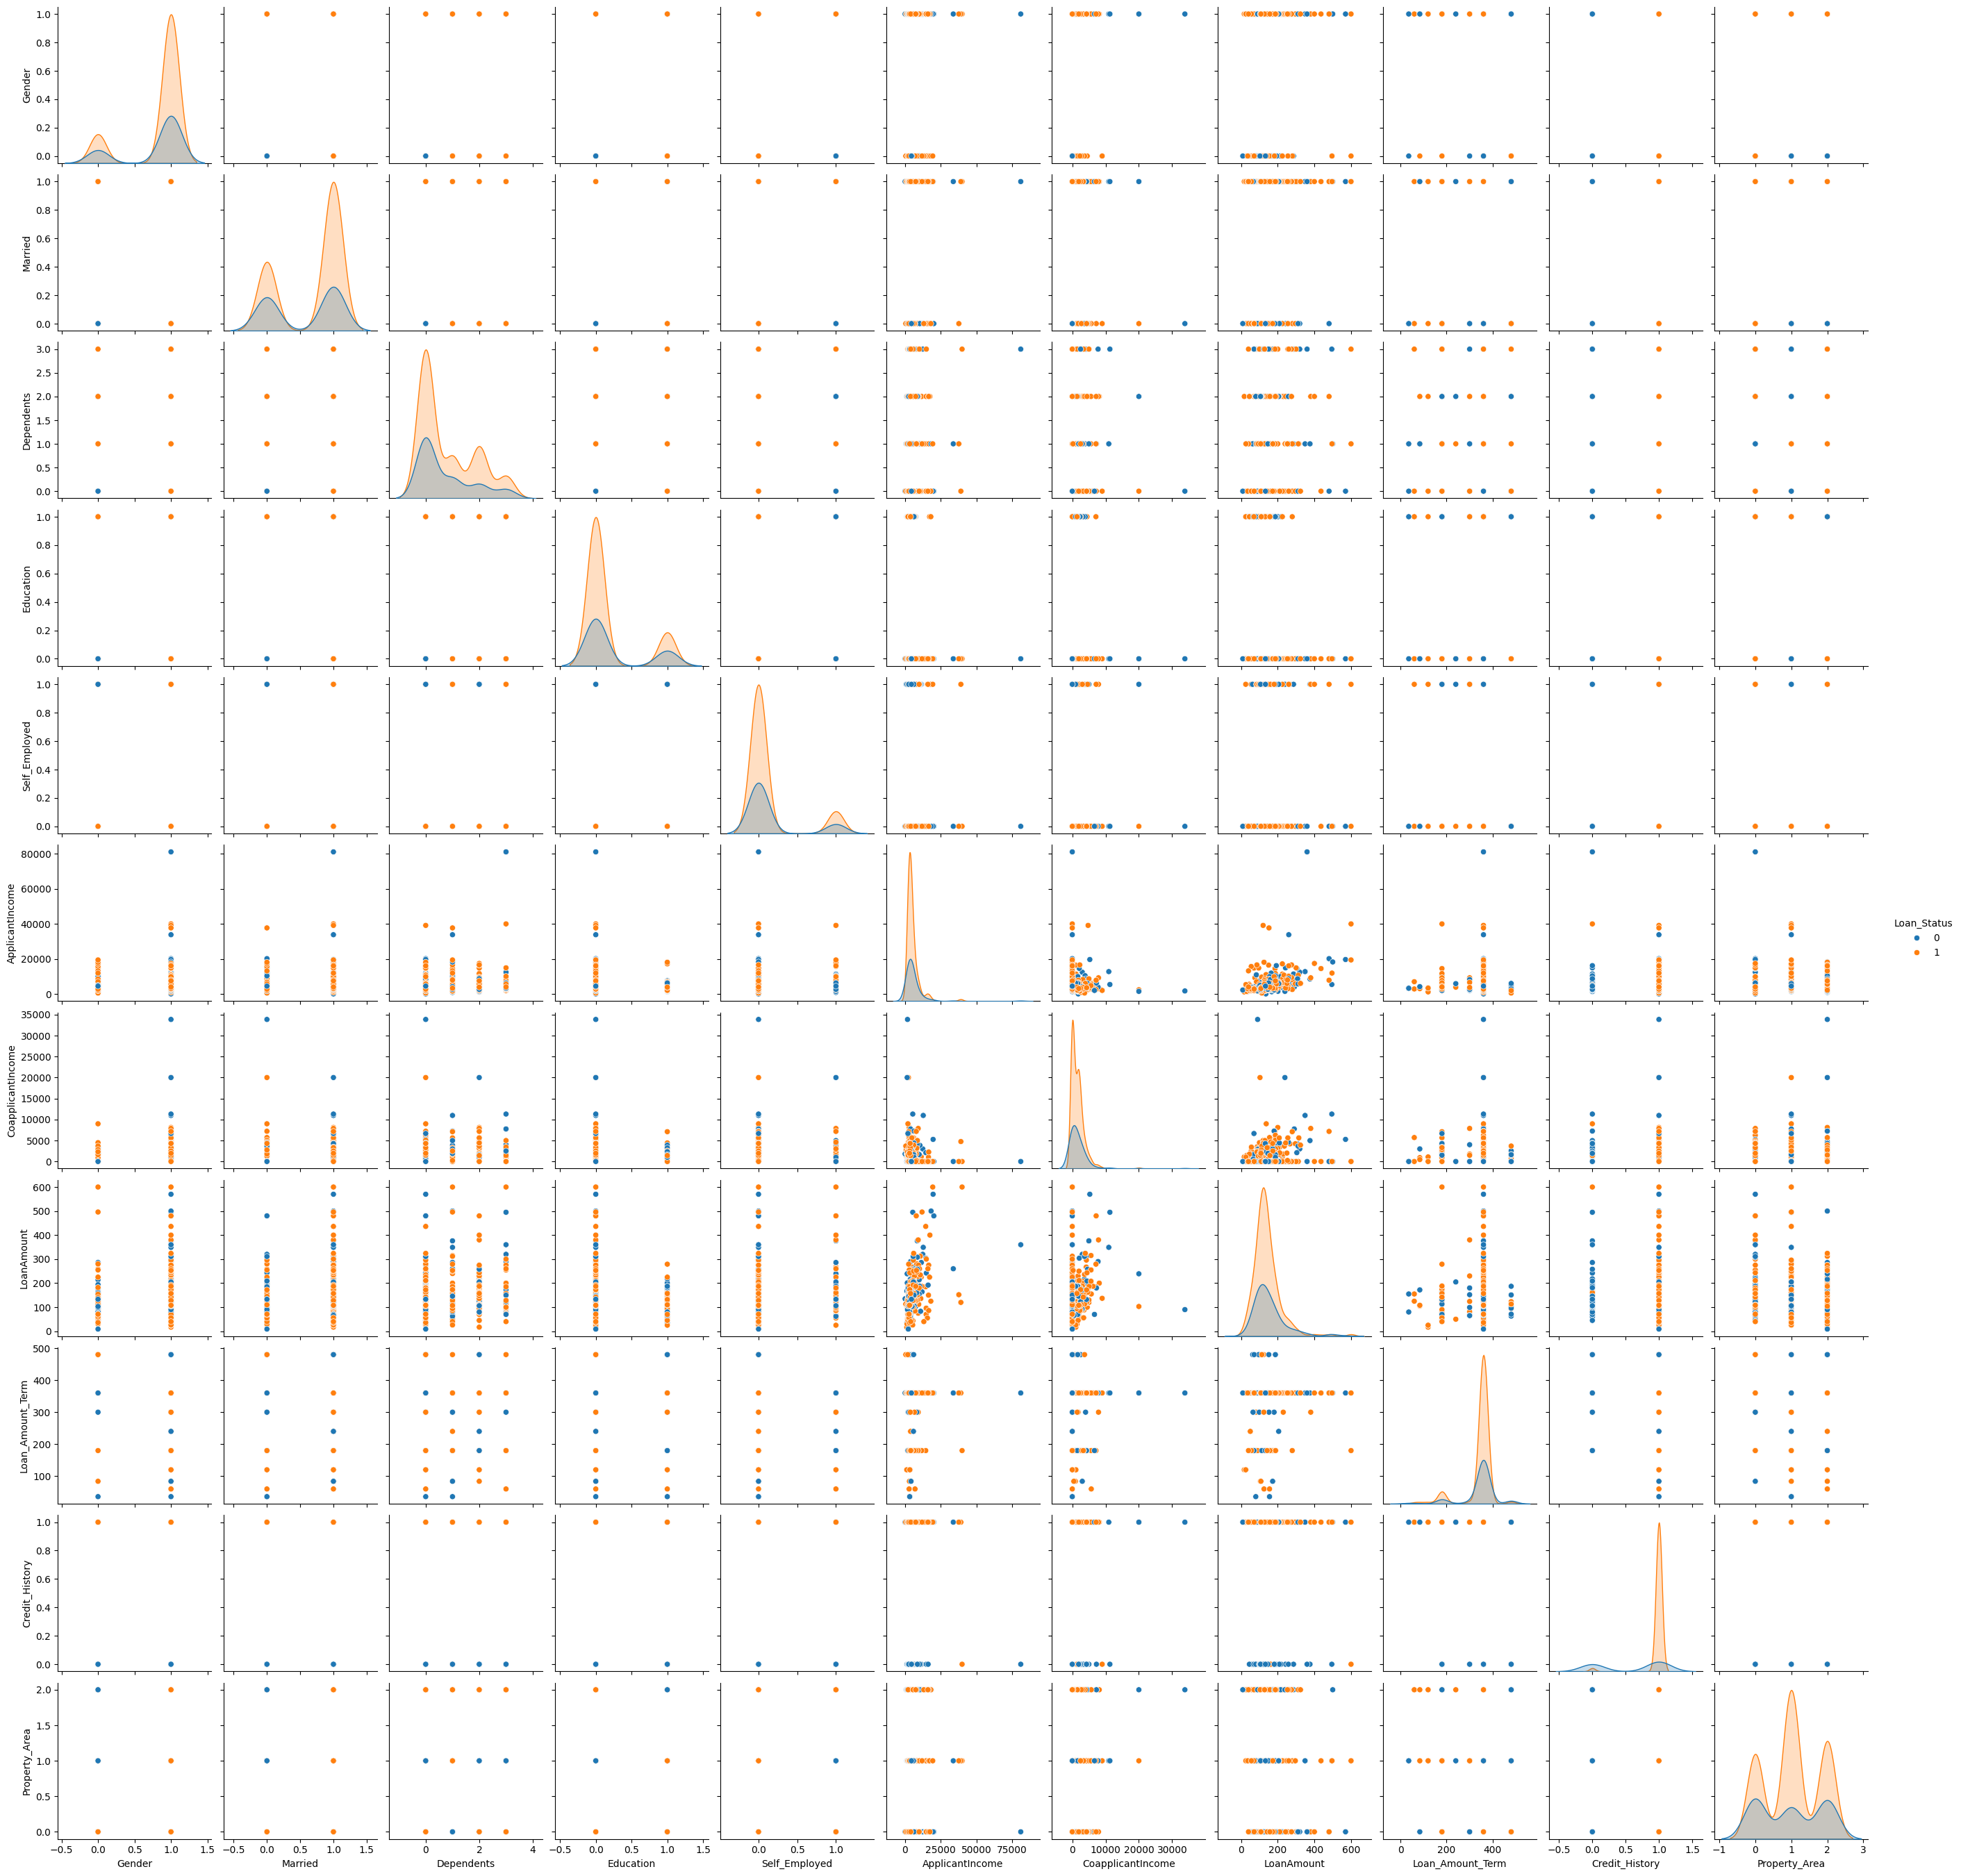

In [ ]:
sns.pairplot(loan,hue="Loan_Status")

<Axes: xlabel='Education', ylabel='count'>

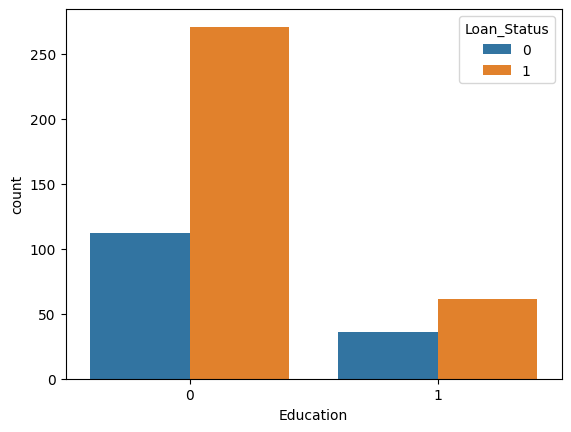

In [ ]:
#education and loan status
sns.countplot(x='Education',hue="Loan_Status",data=loan)

<Axes: xlabel='Married', ylabel='count'>

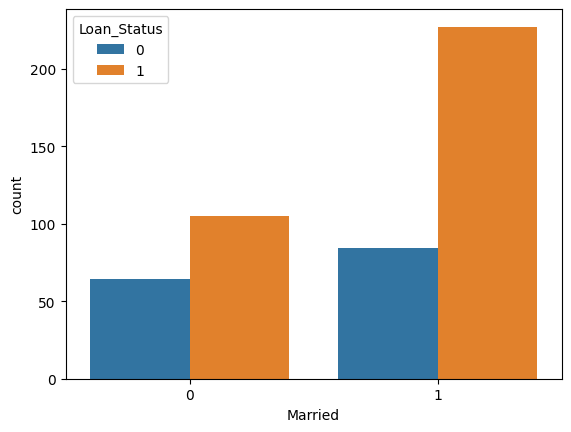

In [ ]:
#marital status and loan status
sns.countplot(x="Married",hue="Loan_Status",data=loan)

In [ ]:
#convert categorical columns to numerical columns
loan.replace({"Married":{"No":0,"Yes":1}},inplace=True)
loan.replace({"Gender":{"Female":0,"Male":1}},inplace=True)
loan.replace({"Self_Employed":{"No":0,"Yes":1}},inplace=True)
loan.replace({"Property_Area":{"Rural":0,"Semiurban":1,"Urban":2}},inplace=True)
loan.replace({"Education":{"Graduate":1,"Not Graduate":0}},inplace=True)
loan.head()


,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
1,LP001003,1,1,1,0,0,4583,1508.0,128.0,360.0,1.0,0,0
2,LP001005,1,1,0,0,1,3000,0.0,66.0,360.0,1.0,2,1
3,LP001006,1,1,0,1,0,2583,2358.0,120.0,360.0,1.0,2,1
4,LP001008,1,0,0,0,0,6000,0.0,141.0,360.0,1.0,2,1
5,LP001011,1,1,2,0,1,5417,4196.0,267.0,360.0,1.0,2,1


In [ ]:
#separating data and label
X=loan.drop(columns=['Loan_ID','Loan_Status'],axis=1)
Y=loan['Loan_Status']

In [ ]:
print(X)
print(Y)

     Gender  Married  Dependents  Education  Self_Employed  ApplicantIncome  \
1         1        1           1          0              0             4583   
2         1        1           0          0              1             3000   
3         1        1           0          1              0             2583   
4         1        0           0          0              0             6000   
5         1        1           2          0              1             5417   
..      ...      ...         ...        ...            ...              ...   
609       0        0           0          0              0             2900   
610       1        1           3          0              0             4106   
611       1        1           1          0              0             8072   
612       1        1           2          0              0             7583   
613       0        0           0          0              1             4583   

     CoapplicantIncome  LoanAmount  Loan_Amount_Ter

In [ ]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.1,stratify=Y,random_state=2)

In [ ]:
print(X.shape,X_train.shape,X_test.shape)

(480, 11) (432, 11) (48, 11)


In [ ]:
#model=svm.SVC(kernel='linear')
xgb_model = xgb.XGBClassifier(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)


In [ ]:
xgb_model.fit(X_train,Y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=3, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=100, n_jobs=None,
              num_parallel_tree=None, random_state=42, ...)

Model evaluation

In [ ]:
#accuracy on training data
X_train_prediction=xgb_model.predict(X_train)
training_data_accuracy=accuracy_score(X_train_prediction,Y_train)

In [ ]:
print("Accuracy on training data: ",training_data_accuracy)

Accuracy on training data:  0.8634259259259259


In [ ]:
#accuracy on test data
X_test_prediction=xgb_model.predict(X_test)
test_data_accuracy=accuracy_score(X_test_prediction,Y_test)
print("Accuracy on training data: ",test_data_accuracy)

Accuracy on training data:  0.8333333333333334


Make a predictive system


In [ ]:

input=['Male','Yes',1,'Graduate','No','10750',0,312,360,1,'Urban']
for elements in input:
  if elements=='Male':
    input[input.index(elements)]=1
  elif elements=='Female':
    input[input.index(elements)]=0
  if elements=='Yes':
    input[input.index(elements)]=1
  elif elements=='No':
    input[input.index(elements)]=0
  if elements=='Graduate':
    input[input.index(elements)]=1
  elif elements=='Not Graduate':
    input[input.index(elements)]=0
  if elements=='Semiurban':
    input[input.index(elements)]=1
  elif elements=='Urban':
    input[input.index(elements)]=2
  elif elements=='Rural':
    input[input.index(elements)]=0
  if elements=='3+':
    input[input.index(elements)]=4
input_arr=np.asarray(input)
input_resh=input_arr.reshape(1,-1)
print(input)
prediction=xgb_model.predict(input_resh)
print(prediction)
if prediction[0]==0:
  print("Loan will not be approved")
else:
  print("Loan will be approved")



[1, 1, 1, 1, 0, '10750', 0, 312, 360, 1, 2]


XGBoostError: [17:45:34] /workspace/src/c_api/../data/array_interface.h:499: Unicode-2 is not supported.
Stack trace:
  [bt] (0) /usr/local/lib/python3.11/dist-packages/xgboost/lib/libxgboost.so(+0x25c1ac) [0x7eac5b65c1ac]
  [bt] (1) /usr/local/lib/python3.11/dist-packages/xgboost/lib/libxgboost.so(+0x26eb41) [0x7eac5b66eb41]
  [bt] (2) /usr/local/lib/python3.11/dist-packages/xgboost/lib/libxgboost.so(+0x56c6b9) [0x7eac5b96c6b9]
  [bt] (3) /usr/local/lib/python3.11/dist-packages/xgboost/lib/libxgboost.so(XGBoosterPredictFromDense+0xbf) [0x7eac5b56ac8f]
  [bt] (4) /lib/x86_64-linux-gnu/libffi.so.8(+0x7e2e) [0x7eacc835be2e]
  [bt] (5) /lib/x86_64-linux-gnu/libffi.so.8(+0x4493) [0x7eacc8358493]
  [bt] (6) /usr/lib/python3.11/lib-dynload/_ctypes.cpython-311-x86_64-linux-gnu.so(+0xa4d8) [0x7eacc85bc4d8]
  [bt] (7) /usr/lib/python3.11/lib-dynload/_ctypes.cpython-311-x86_64-linux-gnu.so(+0x9c8e) [0x7eacc85bbc8e]
  [bt] (8) /usr/bin/python3(_PyObject_MakeTpCall+0x27c) [0x52f67c]



In [ ]:
input=['Male','Yes',1,'Graduate','No','10750',0,312,360,1,'Urban']
# Convert categorical features to numerical using a dictionary mapping
categorical_features = {
    'Gender': {'Male': 1, 'Female': 0},
    'Married': {'Yes': 1, 'No': 0},
    'Education': {'Graduate': 1, 'Not Graduate': 0},
    'Self_Employed': {'Yes': 1, 'No': 0},
    'Property_Area': {'Rural': 0, 'Semiurban': 1, 'Urban': 2},
    'Dependents': {'3+': 4}  # Include '3+' mapping
}

# Iterate through the input list and apply mappings
for i in range(len(input)):
    for feature, mapping in categorical_features.items():
        if input[i] in mapping:
            input[i] = mapping[input[i]]
            break  # Exit inner loop once a mapping is found

# Convert loan amount to float (or int if appropriate)
input[5] = float(input[5])  # Assuming '10750' is the loan amount

input_arr = np.asarray(input, dtype=np.float64) # Convert to numpy array with explicit float type
input_resh = input_arr.reshape(1, -1)
print(input)
prediction = xgb_model.predict(input_resh)
print(prediction)
if prediction[0] == 0:
    print("Loan will not be approved")
else:
    print("Loan will be approved")

[1, 1, 1, 1, 0, 10750.0, 0, 312, 360, 1, 2]
[1]
Loan will be approved


In [ ]:
import pandas as pd
df=pd.read_csv('/content/dataset.csv')
from sklearn.preprocessing import StandardScaler

In [ ]:
df.head()

,Marital status,Application mode,Application order,Course,Daytime/evening attendance,Previous qualification,Nacionality,Mother's qualification,Father's qualification,Mother's occupation,...,Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP,Target
0,1,8,5,2,1,1,1,13,10,6,...,0,0,0,0,0.000000,0,10.8,1.4,1.74,Dropout
1,1,6,1,11,1,1,1,1,3,4,...,0,6,6,6,13.666667,0,13.9,-0.3,0.79,Graduate
2,1,1,5,5,1,1,1,22,27,10,...,0,6,0,0,0.000000,0,10.8,1.4,1.74,Dropout
3,1,8,2,15,1,1,1,23,27,6,...,0,6,10,5,12.400000,0,9.4,-0.8,-3.12,Graduate
4,2,12,1,3,0,1,1,22,28,10,...,0,6,6,6,13.000000,0,13.9,-0.3,0.79,Graduate


In [ ]:

df.columns

Index(['Marital status', 'Application mode', 'Application order', 'Course',
       'Daytime/evening attendance', 'Previous qualification', 'Nacionality',
       'Mother's qualification', 'Father's qualification',
       'Mother's occupation', 'Father's occupation', 'Displaced',
       'Educational special needs', 'Debtor', 'Tuition fees up to date',
       'Gender', 'Scholarship holder', 'Age at enrollment', 'International',
       'Curricular units 1st sem (credited)',
       'Curricular units 1st sem (enrolled)',
       'Curricular units 1st sem (evaluations)',
       'Curricular units 1st sem (approved)',
       'Curricular units 1st sem (grade)',
       'Curricular units 1st sem (without evaluations)',
       'Curricular units 2nd sem (credited)',
       'Curricular units 2nd sem (enrolled)',
       'Curricular units 2nd sem (evaluations)',
       'Curricular units 2nd sem (approved)',
       'Curricular units 2nd sem (grade)',
       'Curricular units 2nd sem (without evaluations)

In [ ]:
df['Target'].value_counts()

,count
Target,
Graduate,2209
Dropout,1421
Enrolled,794
